In [85]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy

In [46]:
Tweet= pd.read_csv("Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Descriptive Analysis

In [47]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [48]:
Mood_count=Tweet['airline_sentiment'].value_counts()
Mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Moods')

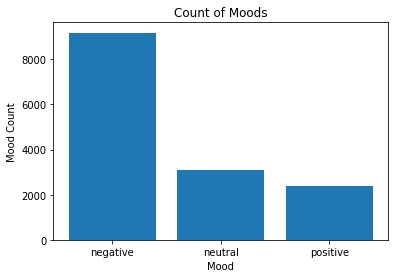

In [49]:
Index = [1,2,3]
plt.bar(Index, Mood_count)
plt.xticks(Index, ['negative', 'neutral', 'positive'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [50]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

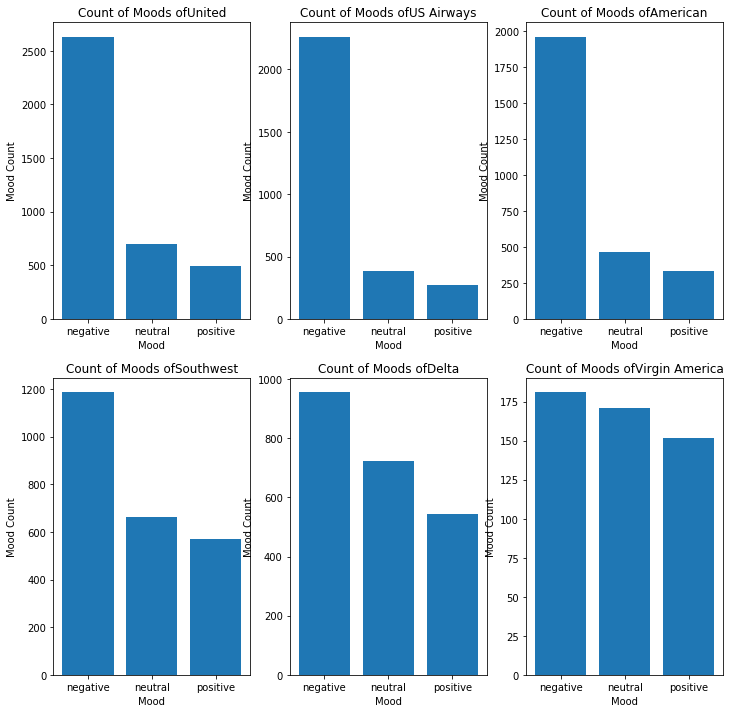

In [51]:
def plot_sub_sentiment(airline):
    df = Tweet[Tweet['airline'] == airline]
    count = df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count)
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of' + str(airline))
plt.figure(1,figsize=(12,12))
plt.subplot(231)
plot_sub_sentiment('United')
plt.subplot(232)
plot_sub_sentiment('US Airways')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [52]:
NR_count = dict(Tweet['negativereason'].value_counts())
NR_count

{'Customer Service Issue': 2910,
 'Late Flight': 1665,
 "Can't Tell": 1190,
 'Cancelled Flight': 847,
 'Lost Luggage': 724,
 'Bad Flight': 580,
 'Flight Booking Problems': 529,
 'Flight Attendant Complaints': 481,
 'longlines': 178,
 'Damaged Luggage': 74}

In [53]:
from wordcloud import WordCloud,STOPWORDS

In [54]:
df=Tweet[Tweet['airline_sentiment']=='negative']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [55]:
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [56]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

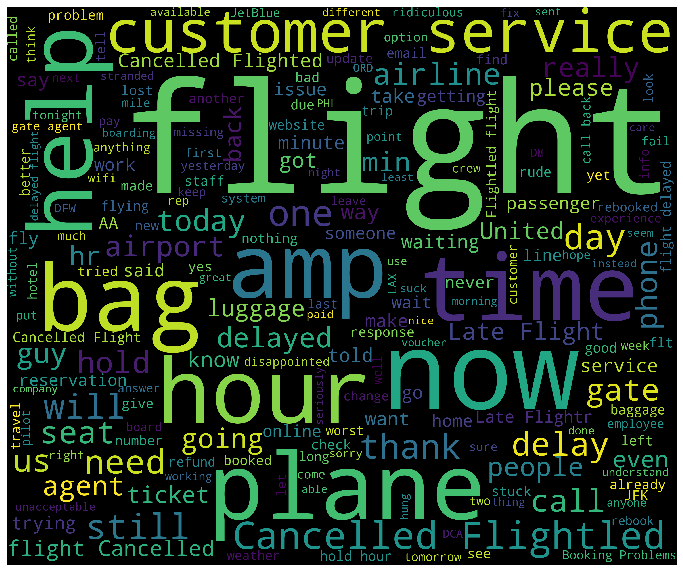

In [57]:
plt.figure(1,figsize = (12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Preprocess Data

In [58]:
import re
import nltk
from nltk.corpus import stopwords

In [59]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub('[^a-zA-Z]', ' ', raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('English'))
    meaningful_words = [w for w in words if not w in stops]
    return(' '.join(meaningful_words))

In [60]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [61]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [62]:
Tweet['clean_tweet'] = Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length'] = Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [63]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

## Machine Learning Models

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [66]:
Classifiers = [LogisticRegression(C = 0.000000001, solver = 'liblinear', max_iter = 200),
              KNeighborsClassifier(3),
              SVC(kernel = 'rbf', C = 0.025, probability = True),
              DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators = 200),
              AdaBoostClassifier(),
              GaussianNB()]

In [67]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy)) 

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5891393442622951


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7517076502732241
Accuracy of RandomForestClassifieris 0.8128415300546448
Accuracy of AdaBoostClassifieris 0.7855191256830601
Accuracy of GaussianNBis 0.5724043715846995


Text(0.5, 1.0, 'Accuracies of Models')

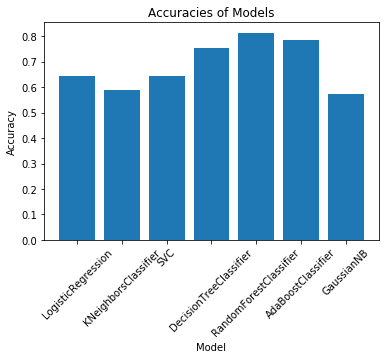

In [70]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index, Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

## LSTM Network

In [72]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [78]:
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(Tweet['clean_tweet'].values)
X = tokenizer.texts_to_sequences(Tweet['clean_tweet'].values)
X = pad_sequences(X)

In [79]:
max_fatures = 2000
embed_dim = 128
lstm_out = 196



model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 22, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 22, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
Y = pd.get_dummies(Tweet['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9808, 22) (9808, 2)
(4832, 22) (4832, 2)


In [87]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
 - 6s - loss: 0.4691 - accuracy: 0.7725
Epoch 2/7
 - 6s - loss: 0.3500 - accuracy: 0.8466
Epoch 3/7
 - 6s - loss: 0.3084 - accuracy: 0.8661
Epoch 4/7
 - 6s - loss: 0.2752 - accuracy: 0.8815
Epoch 5/7
 - 6s - loss: 0.2488 - accuracy: 0.8933
Epoch 6/7
 - 6s - loss: 0.2194 - accuracy: 0.9071
Epoch 7/7
 - 7s - loss: 0.1996 - accuracy: 0.9157
